In [179]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [184]:
%autoreload

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from Visualizer import Visualizer
from Preprocessor import Preprocessor
from Model import Model
from TestModel import TestModel

sns.set_style('darkgrid')
pd.set_option("display.max_columns", None)

In [185]:
preprocessor = Preprocessor()
merged = preprocessor.merged
merged.head()

,id,seller,price,area_total,area_kitchen,area_living,floor,rooms,layout,ceiling,bathrooms_shared,bathrooms_private,windows_court,windows_street,balconies,loggias,condition,phones,building_id,new,latitude,longitude,district,street,address,constructed,material,stories,elevator_without,elevator_passenger,elevator_service,parking,garbage_chute,heating
0,0,3.0,7139520.0,59.2,12.5,31.0,2.0,2.0,NaN,2.65,0.0,2.0,0.0,1.0,NaN,NaN,NaN,1.0,4076,1.0,55.544046,37.478055,11.0,Бунинские Луга ЖК,к2.5/2,2021.0,3.0,9.0,0.0,1.0,1.0,1.0,NaN,NaN
1,1,NaN,10500000.0,88.0,14.2,48.0,18.0,3.0,1.0,NaN,2.0,0.0,1.0,1.0,1.0,0.0,3.0,1.0,1893,0.0,55.861282,37.666647,2.0,улица Радужная,14к3,2010.0,3.0,25.0,0.0,1.0,1.0,1.0,NaN,0.0
2,2,3.0,9019650.0,78.5,22.5,40.8,12.0,3.0,NaN,2.65,0.0,2.0,1.0,1.0,NaN,NaN,NaN,1.0,5176,1.0,55.663299,37.515335,6.0,Саларьево Парк ЖК,38,2021.0,3.0,15.0,0.0,1.0,1.0,1.0,NaN,NaN
3,3,NaN,10500000.0,88.0,14.0,48.0,18.0,3.0,NaN,NaN,0.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,1893,0.0,55.861282,37.666647,2.0,улица Радужная,14к3,2010.0,3.0,25.0,0.0,1.0,1.0,1.0,NaN,0.0
4,4,NaN,13900000.0,78.0,17.0,35.0,7.0,2.0,1.0,2.90,1.0,0.0,1.0,1.0,0.0,1.0,3.0,1.0,6604,0.0,55.590785,37.451438,11.0,улица Сервантеса,1к3,2017.0,2.0,15.0,0.0,1.0,1.0,1.0,0.0,0.0


In [186]:
visualizer = Visualizer()
visualizer.list_missing(merged)

id: 0.0%
seller: 37.92%
price: 0.0%
area_total: 0.0%
area_kitchen: 20.27%
area_living: 16.67%
floor: 0.0%
rooms: 0.0%
layout: 75.77%
ceiling: 47.64%
bathrooms_shared: 16.63%
bathrooms_private: 16.63%
windows_court: 34.67%
windows_street: 34.67%
balconies: 45.18%
loggias: 45.18%
condition: 42.13%
phones: 0.34%
building_id: 0.0%
new: 1.13%
latitude: 0.0%
longitude: 0.0%
district: 0.56%
street: 0.0%
address: 0.0%
constructed: 3.41%
material: 17.06%
stories: 0.0%
elevator_without: 1.53%
elevator_passenger: 1.53%
elevator_service: 1.53%
parking: 29.15%
garbage_chute: 37.84%
heating: 35.05%


In [187]:
merged_test = preprocessor.merged_test
print("Total Rows in test_data:",len(merged_test))
merged_test_nulls = merged_test.isnull().sum()
merged_nulls = merged.isnull().sum()
merged_test_nulls_df = merged_test_nulls.to_frame().rename(columns={0:'Missing values test data'})
merged_nulls_df = merged_nulls.to_frame().rename(columns={0:'Missing values train data'})
pd.concat([merged_nulls_df,merged_test_nulls_df], axis=1)

Total Rows in test_data: 9937


,Missing values train data,Missing values test data
id,0,0.0
seller,8830,3942.0
price,0,NaN
area_total,0,0.0
area_kitchen,4721,2233.0
area_living,3882,2019.0
floor,0,0.0
rooms,0,0.0
layout,17642,7368.0
ceiling,11093,5018.0


In [188]:
general_removed = preprocessor.general_removal(merged.copy())
removed_nans = preprocessor.remove_NaNs(general_removed)
visualizer.list_missing(removed_nans)

seller: 0.0%
price: 0.0%
area_total: 0.0%
area_kitchen: 0.0%
area_living: 0.0%
floor: 0.0%
rooms: 0.0%
ceiling: 0.0%
bathrooms_shared: 0.0%
bathrooms_private: 0.0%
windows_court: 0.0%
windows_street: 0.0%
balconies: 0.0%
loggias: 0.0%
condition: 0.0%
phones: 0.0%
new: 0.0%
latitude: 0.0%
longitude: 0.0%
district: 0.0%
constructed: 0.0%
material: 0.0%
stories: 0.0%
elevator_without: 0.0%
elevator_passenger: 0.0%
elevator_service: 0.0%
parking: 0.0%
garbage_chute: 0.0%
heating: 0.0%
distance_center: 0.0%


In [177]:
data = removed_nans.copy()
data = preprocessor.logify(data, "price")
data = preprocessor.logify(data, "area_total")
data = preprocessor.logify(data, "area_living")
data = preprocessor.logify(data, "area_kitchen")
# We have to talk about distance_center in feautre engineering
# Logyfing city center makes correlation a little better: -0.53 to -0.59
data = preprocessor.skew_fix(data, "distance_center")

#data = preprocessor.feature_scaling(data)
data.head()

,seller,price,area_total,area_kitchen,area_living,floor,rooms,ceiling,bathrooms_shared,bathrooms_private,windows_court,windows_street,balconies,loggias,condition,phones,new,latitude,longitude,district,constructed,material,stories,elevator_without,elevator_passenger,elevator_service,parking,garbage_chute,heating,distance_center
0,3.0,15.781156,4.097672,2.602690,3.465736,2.0,2.0,2.650,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,55.544046,37.478055,11.0,2021.0,3.0,9.0,0.0,1.0,1.0,1.0,1.0,0.0,94.801960
1,3.0,16.166886,4.488636,2.721295,3.891820,18.0,3.0,2.121,2.0,0.0,1.0,1.0,1.0,0.0,3.0,1.0,0.0,55.861282,37.666647,2.0,2010.0,3.0,25.0,0.0,1.0,1.0,1.0,1.0,0.0,73.443923
2,3.0,16.014916,4.375757,3.157000,3.732896,12.0,3.0,2.650,0.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,55.663299,37.515335,6.0,2021.0,3.0,15.0,0.0,1.0,1.0,1.0,1.0,0.0,72.869921
3,3.0,16.166886,4.488636,2.708050,3.891820,18.0,3.0,2.121,0.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0,55.861282,37.666647,2.0,2010.0,3.0,25.0,0.0,1.0,1.0,1.0,1.0,0.0,73.443923
4,3.0,16.447399,4.369448,2.890372,3.583519,7.0,2.0,2.900,1.0,0.0,1.0,1.0,0.0,1.0,3.0,1.0,0.0,55.590785,37.451438,11.0,2017.0,2.0,15.0,0.0,1.0,1.0,1.0,0.0,0.0,89.089551


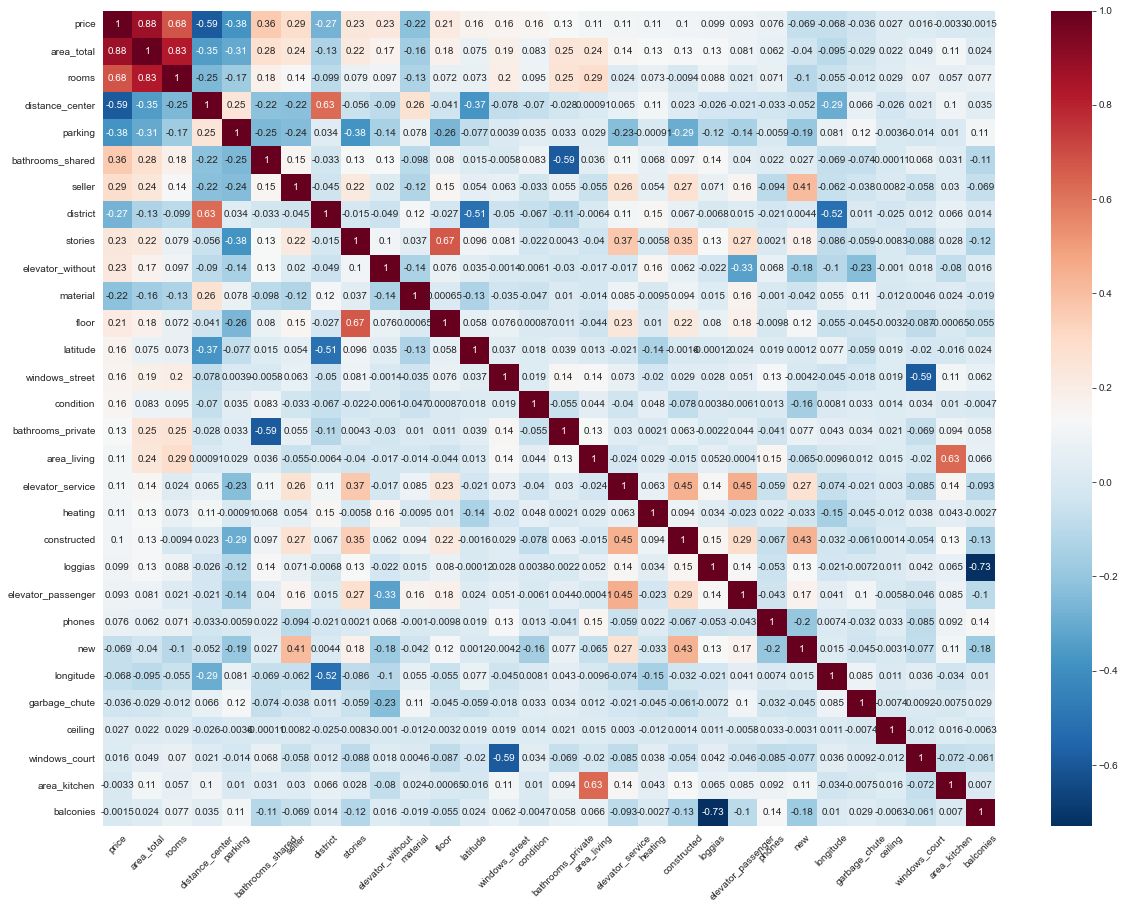

In [178]:
visualizer.price_correlation(data)

Testing Model

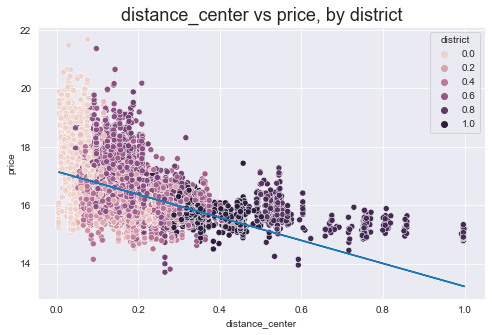

In [87]:
visualizer.plot_vs(data, "distance_center", "price", reg=True, figsize=(8,5), hue="district")

In [16]:
p = Preprocessor()
final = preprocessor.split_categorical_features()
train_data = p.preprocess(final.iloc[:len(p.merged), :])
test_data = p.preprocess(final.iloc[len(p.merged):, :])
labels = train_data["price"]
train_data.drop("price", 1, inplace=True)
test_data.drop("price", 1, inplace=True)

train_data.shape

C:\Users\noran\Desktop\tdt4173\hauk\TDT4173_group69\src\Preprocessor.py:241: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ceiling"][i] = district_average[key]["ceiling"]
C:\Users\noran\Desktop\tdt4173\hauk\TDT4173_group69\src\Preprocessor.py:233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["area_kitchen"][i] = district_average[key]["area_kitchen"]
C:\Users\noran\Desktop\tdt4173\hauk\TDT4173_group69\src\Preprocessor.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

(23285, 49)